In [113]:
import math
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
def powerLaw(t, n):
    #Given the customer's age and power of the probability 
    #returns the expected number of users invited.
    return float(1)/math.pow(t,n)

In [3]:
def expon(t, alpha, r):
    return math.exp((-alpha*t)+r*(random.random()-0.5))

In [6]:
#Probably a dictionary would be a better data store here?
retentionData =[]
for i in range(0,13):
    for j in range(0,i+1):
        #Providing decay with a random fluctuation.  New cohorts do slightly better
        value = math.exp((-.2 - float(i)/100)*j)+0.1*(random.random()-0.5)
        if j == 0:
            retentionData.append([i, j, 1])
        else:
            retentionData.append([i, j, value])

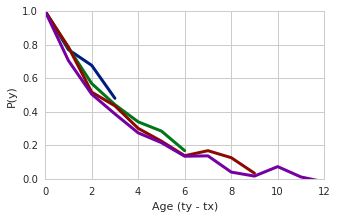

In [18]:
plt.figure(figsize=(5,3))
plt.style.use('seaborn-whitegrid')
plt.rc('lines', linewidth=3)

plt.plot([item[1] for item in retentionData if item[0]==3] ,[item[2] for item in retentionData if item[0]==3]) 
plt.plot([item[1] for item in retentionData if item[0]==6] ,[item[2] for item in retentionData if item[0]==6]) 
plt.plot([item[1] for item in retentionData if item[0]==9] ,[item[2] for item in retentionData if item[0]==9]) 
plt.plot([item[1] for item in retentionData if item[0]==12] ,[item[2] for item in retentionData if item[0]==12]) 
plt.xlabel('Age (ty - tx)')
plt.ylabel('P(y)')
plt.ylim((0,1))
plt.show()

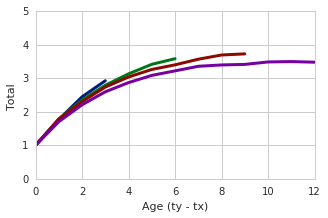

In [17]:
plt.figure(figsize=(5,3))
plt.style.use('seaborn-whitegrid')
plt.plot([item[1] for item in retentionData if item[0]==3] ,np.cumsum([item[2] for item in retentionData if item[0]==3]))
plt.plot([item[1] for item in retentionData if item[0]==6] ,np.cumsum([item[2] for item in retentionData if item[0]==6])) 
plt.plot([item[1] for item in retentionData if item[0]==9] ,np.cumsum([item[2] for item in retentionData if item[0]==9])) 
plt.plot([item[1] for item in retentionData if item[0]==12] ,np.cumsum([item[2] for item in retentionData if item[0]==12])) 

plt.xlabel('Age (ty - tx)')
plt.ylabel('Total')
plt.ylim((0,5))
plt.show()

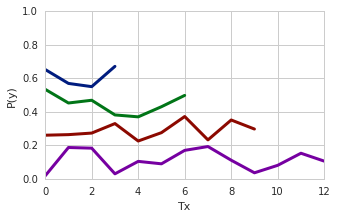

In [48]:
plt.figure(figsize=(5,3))
plt.style.use('seaborn-whitegrid')
plt.plot([i for i in range(4)] ,[0.6 + 0.2*(random.random()-0.5) for i in range(4)])
plt.plot([i for i in range(7)] ,[0.45 + 0.17*(random.random()-0.5) for i in range(7)])
plt.plot([i for i in range(10)] ,[0.3 + 0.15*(random.random()-0.5) for i in range(10)])
plt.plot([i for i in range(13)] ,[0.1 + 0.2*(random.random()-0.5) for i in range(13)])
plt.xlabel('Tx')
plt.ylabel('P(y)')
plt.ylim((0,1))
plt.show()

# DAU Projection Using Retention

In [74]:
def computeDAUPow(cohorts, n):
    L = len(cohorts)
    DAU = [cohorts[1]]
    for i in range(L):
        actives=[]
        for t in range(i):
            actives.append(cohorts[i-t-1]*powerLaw(t+1,n))
        DAU.append(sum(actives))
    return DAU 

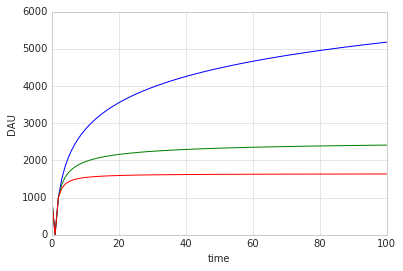

In [102]:
aa = computeDAUPow([1000 for i in range(100)], 1)
bb = computeDAUPow([1000 for i in range(100)], 1.5)
cc = computeDAUPow([1000 for i in range(100)], 2)

plt.figure(figsize=(6,4))
plt.style.use('seaborn-whitegrid')
plt.xlabel('time')
plt.ylabel('DAU')

plt.plot(aa)
plt.plot(bb)
plt.plot(cc)
plt.show()

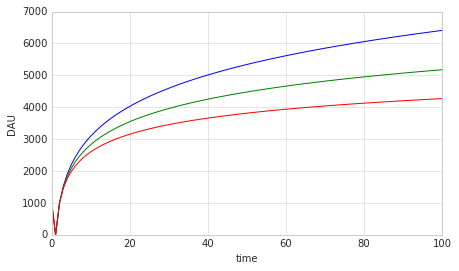

In [103]:
aa = computeDAUPow([1000 for i in range(100)], 0.9)
bb = computeDAUPow([1000 for i in range(100)], 1.0)
cc = computeDAUPow([1000 for i in range(100)], 1.1)

plt.figure(figsize=(7,4))
plt.style.use('seaborn-whitegrid')
plt.xlabel('time')
plt.ylabel('DAU')

plt.plot(aa)
plt.plot(bb)
plt.plot(cc)

plt.show()

# Viral Growth

In [60]:
def computeNewUsersExp(initialCohort, generations, alpha, beta):
        #Given an initial chort size and age dependent virality, 
        #computes the expected cohorts for the next generations.
        cohorts=[initialCohort]
        for g in range(generations):
            L=len(cohorts)
            newCohort=[]
            for t in range(L):
                #This is the viral coeffient on the Nth day of every user's life
                #summed over users of all ages.
                newCohort.append(beta*cohorts[L-t-1]*expon(t+1, alpha, 0.1))
            cohorts.append(sum(newCohort))
        return cohorts

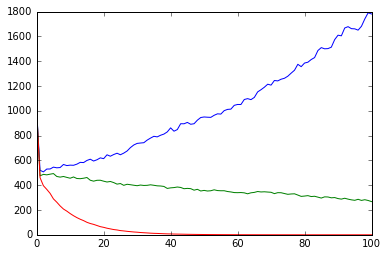

In [61]:
aa=computeNewUsersExp(1000,100, 0.68, 1)
bb=computeNewUsersExp(1000,100, 0.7, 1)
cc=computeNewUsersExp(1000,100, 0.8, 1)

plt.plot(aa)
plt.plot(bb)
plt.plot(cc)
plt.show()

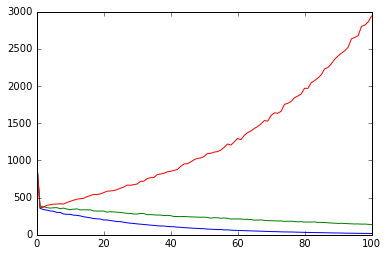

In [63]:
aa=computeNewUsersExp(1000,100, 0.5, .6)
bb=computeNewUsersExp(1000,100, 0.48, .6)
cc=computeNewUsersExp(1000,100, 0.45, .6)

plt.plot(aa)
plt.plot(bb)
plt.plot(cc)
plt.show()

In [68]:
def computeNewUsersPow(initialCohort, generations, n, alpha):
        #Given an initial chort size and age dependent virality, 
        #computes the expected cohorts for the next generations.
        cohorts=[initialCohort]
        for g in range(generations):
            L=len(cohorts)
            newCohort=[]
            for t in range(L):
                newCohort.append(alpha*cohorts[L-t-1]*powerLaw(t+1, n))
            cohorts.append(sum(newCohort))
        return cohorts

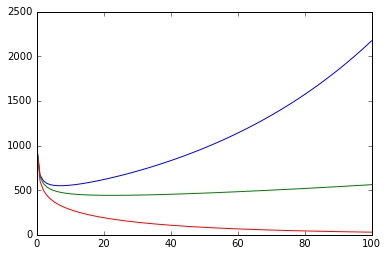

In [69]:
aa=computeNewUsersPow(1000,100, 2.1, 0.67)
bb=computeNewUsersPow(1000,100, 2.1, 0.65)
cc=computeNewUsersPow(1000,100, 2.1, 0.6)

plt.plot(aa)
plt.plot(bb)
plt.plot(cc)
plt.show()

In [70]:
def computeNewUsersPowSat(initialCohort, generations, n, alpha, S):
# Includes saturation to limit the amount that virality can grow indefinitely
        cohorts=[initialCohort]
        for g in range(generations):
            L=len(cohorts)
            newCohort=[]
            for t in range(L):
                newCohort.append(alpha*cohorts[L-t-1]*powerLaw(t+1, n)*float((S-sum(cohorts)))/(S))
            cohorts.append(sum(newCohort))
        return cohorts

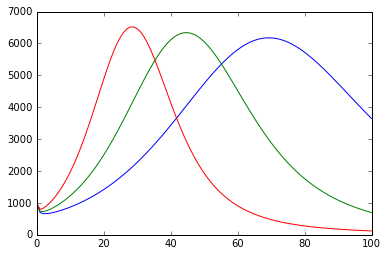

In [72]:
aa=computeNewUsersPowSat(1000,100, 2, 0.7, 2000000)
bb=computeNewUsersPowSat(1000,100, 2, 0.74, 1000000)
cc=computeNewUsersPowSat(1000,100, 2, 0.8, 500000)
plt.plot(aa)
plt.plot(bb)
plt.plot(cc)
plt.show()

In [146]:
df = pd.DataFrame(zz)

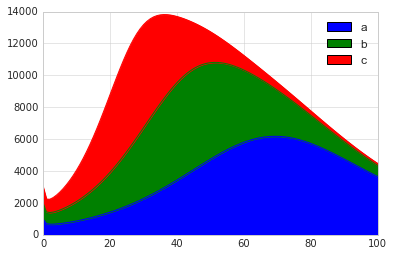

In [149]:
aa=computeNewUsersPowSat(1000,100, 2, 0.7, 2000000)
bb=computeNewUsersPowSat(1000,100, 2, 0.74, 1000000)
cc=computeNewUsersPowSat(1000,100, 2, 0.8, 500000)
zz=np.stack((np.array(aa), np.array(bb), np.array(cc)),axis=1)
df = pd.DataFrame(zz, columns=['a', 'b', 'c'])
df.plot(kind='area');

In [144]:
len(rr)

2

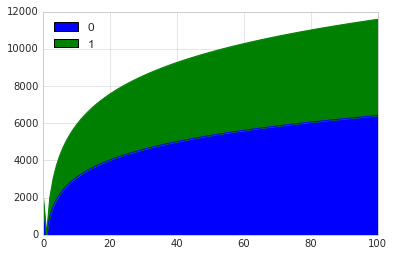

In [147]:
df.plot(kind='area');

In [150]:
def computeDAUPow(cohorts, n):
    L = len(cohorts)
    DAU = [cohorts[1]]
    for i in range(L):
        actives=[]
        for t in range(i):
            actives.append(cohorts[i-t-1]*powerLaw(t+1,n))
        DAU.append(sum(actives))
    return DAU 

# I dont think this is right because the ith component of DAU only uses the ith cohort to calculate it!

In [166]:
cohortsA = [100, 100, 100]
cohortsB = [100, 100, 100]
cohortsA = [100, 100, 100]

currentDay = len(cohorts)
DAU=[]
for daysOut in range(10):
    actives = []
    for i in range(currentDay):
        actives.append(cohorts[currentDay-i-1]*linearRetention(daysOut + i, 0.2))
    DAU.append(sum(actives))
        
DAU        

[240.0, 180.0, 120.0, 60.0, 20.0, 0, 0, 0, 0, 0]

In [192]:
def computeDAULin(cohorts, m, daysOut):
    currentDay = len(cohorts)
    DAU = []
    #First Calculate DAU while cohorts are being acquired
    for t in range(currentDay):
        actives=[]
        for i in range(t):
            actives.append(cohorts[t-i-1]*linearRetention(i,m))
        DAU.append(sum(actives))
    #Now calculate more DAU as we project out after acquiring cohorts
    for t in range(daysOut):
        actives=[]
        for i in range(currentDay):
            actives.append(cohorts[currentDay-i-1]*linearRetention(t+i,m))
        DAU.append(sum(actives))
    return DAU 

#this correctly accounts for going forward while computeDAUPow accounts for going backward

In [161]:
def linearRetention(x, m):
    if x < 0:
        return 0
    elif 1 - m*x  > 0:
        return round(1 -m*x, 3)
    else:
        return 0
    

In [163]:
linearRetention(-9, 0.1)

0

In [194]:
aCohort=[1000*(1+0.2*(random.random()-0.5)) for i in range(100)]
bCohort=[500*(1+0.4*(random.random()-0.5)) for i in range(100)]
cCohort=[100*(1+0.5*(random.random()-0.5)) for i in range(100)]

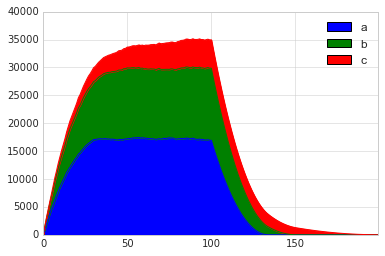

In [196]:
aDAU = computeDAULin(aCohort, 0.03, 100)
bDAU = computeDAULin(bCohort, 0.02, 100)
cDAU = computeDAULin(cCohort, 0.01, 100)

zz=np.stack((np.array(aDAU), np.array(bDAU), np.array(cDAU)),axis=1)
df = pd.DataFrame(zz, columns=['a', 'b', 'c'])
df.plot(kind='area');